# Data analysis for MSc5_research_project 

This jupyter notebook deals with analysing the data for my research project within the MSc05 course in the Neurocognitive Psychology lab at Goethe University Frankfurt within the psychology master degree program.

Just to repeat briefly, the aim of the project is to use machine learning in order to predict whether a particpant can be classified either as control or patient with psychotic disorder based on different brain modalities. Before starting with our first modality being **cortical thickness (CT)**, the learning problem and the task type should be defined to know which model suits the best for the purpose of the project aim.

## 1. Learning problem and task type

Considering the task type, our purpose is to classify the samples in two categories being control and patient. Hence, the task type is **classification**. For that, I want to use the given information regarding the labels for each sample, consequently the learning problem is **supervised**.

More specifically, with the data at hand the task type is **binary classification**. **Binary classification** refers to those classification task that have two class labels (in this data set control/patient). 
Commonly used algorithms for binary classification include **Logistic Regression, k-Nearest Neighbors, Decision Trees, Support Vector Machine and Naive Bayes** (for further information click [here](https://machinelearningmastery.com/types-of-classification-in-machine-learning/)).
In this project, I will focus on two algorithms being **Logistic Regression** and **Support Vector Machine**. For the latter, there is a separate notebook called **SVM**. 

## 2. Logistic Regression

In this section, the logistic regression is computed for both, the micro - and macrostructural data. Firstly, we start with **CT**.

## 2.1 Cortical Thickness (CT)

### 2.1.1 Data preperation

In [130]:
#import relevant modules

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [131]:
#read data

CT_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_thickness_Dublin.csv')
CT_Dublin = pd.read_csv(CT_Dublin_path)

In [132]:
CT_Dublin

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON9225,21,2,1,2.180,2.382,2.346,2.526,2.747,2.544,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,CON9229,28,2,1,2.394,1.973,2.534,2.439,2.485,2.435,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,CON9231,29,2,1,2.551,2.567,1.954,2.439,2.428,2.190,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,GASP3037,61,1,2,2.187,1.923,2.160,2.410,2.381,2.277,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,GASP3040,47,1,2,1.862,1.750,2.129,2.516,2.244,2.169,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,RPG9019,31,1,2,2.240,2.150,1.995,2.254,2.164,2.008,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,RPG9102,42,2,2,2.269,2.124,2.531,2.502,2.250,2.183,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,RPG9119,41,1,2,2.273,2.559,2.578,2.463,2.463,2.053,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,RPG9121,51,1,2,1.940,2.438,2.272,2.272,2.610,2.099,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


The data contains variables such as SubjectID, Age and Sex which are not relevant for the classification. Hence, we adjust the dataframe accordingly.

In [133]:
#adjust dataframe

CT_Dublin_adj = CT_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [134]:
CT_Dublin_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,1,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,1,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,1,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,2,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,2,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,2,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,2,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,2,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


As the dataframe shows, the Group variable contains information of whether the samples belong to control or patient. In this case, 1 indicates control and 2 patient. In order to perform a **Logistic Regression**, the labels of the outputs requires to be 0 and 1 since the probability of an instance belonging to a default class is computed.

In [135]:
#label group 1 as 0 and 2 as 1

CT_Dublin_adj['Group'] = CT_Dublin_adj['Group'].replace([1,2],[0, 1])

In [136]:
CT_Dublin_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,0,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,0,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,0,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,1,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,1,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,1,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,1,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,1,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


In [137]:
#get shape of df_adj

CT_Dublin_adj.shape

(108, 309)

To get an idea of how many of the participants belong to control and patient group and to plot that we can simply execute the following commands.

In [138]:
CT_Dublin_adj['Group'].value_counts()

0    80
1    28
Name: Group, dtype: int64

<AxesSubplot:xlabel='Group', ylabel='count'>

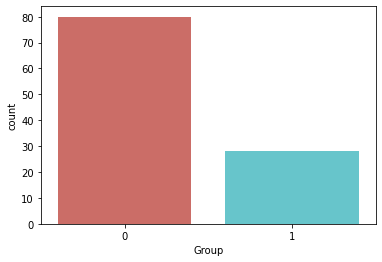

In [139]:
sns.countplot(x='Group', data = CT_Dublin_adj, palette='hls')

The plot shows a clear unequal distribution of the participants in the Group variable. 

Because the LogisticRegression function from sklearn requires the inputs to be numpy arrays, in the following step the dataframe is converted to a numpy array.

In [140]:
#dataframe as numpy array 

CT_Dublin_adj.to_numpy()

array([[0.   , 2.18 , 2.382, ..., 2.776, 3.282, 3.347],
       [0.   , 2.394, 1.973, ..., 2.654, 3.124, 3.214],
       [0.   , 2.551, 2.567, ..., 2.495, 2.669, 2.886],
       ...,
       [1.   , 2.273, 2.559, ..., 2.294, 2.571, 2.875],
       [1.   , 1.94 , 2.438, ..., 2.51 , 2.759, 2.838],
       [1.   , 2.108, 2.269, ..., 2.551, 2.855, 2.985]])

### 2.1.2 Building the model

In the next steps, the **logistic regression** model is built. Firstly, the input and output should be defined. Our input contains the **CT** for all of the 308 brain regions, meaning that there are n=308 features in total. The output is within the Group variable containing label information.

In [141]:
#define input

X = CT_Dublin_adj.iloc[:,1:308].values

In [142]:
X

array([[2.18 , 2.382, 2.346, ..., 3.62 , 2.776, 3.282],
       [2.394, 1.973, 2.534, ..., 3.588, 2.654, 3.124],
       [2.551, 2.567, 1.954, ..., 3.657, 2.495, 2.669],
       ...,
       [2.273, 2.559, 2.578, ..., 3.48 , 2.294, 2.571],
       [1.94 , 2.438, 2.272, ..., 3.187, 2.51 , 2.759],
       [2.108, 2.269, 2.145, ..., 3.192, 2.551, 2.855]])

In [143]:
X.shape

(108, 307)

In [144]:
#output

y = CT_Dublin_adj.iloc[:,[0]].values

In [145]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [146]:
y.shape

(108, 1)

In [147]:
y = y.ravel()

In [148]:
y.shape

(108,)

Now having defined our input and ouput data, to build the logistic regression model we need to split our data into train and test sets. For this, we use the train_test_split splitter function from Sklearn. The training set is the dataset on which the model is trained. This data is seen and learned by the model. The test set is a a subset of the training set and utilized for an accurate evaluation of a final model fit.
With that function, the data gets divided into X_train, X_test, y_train and y_test. X_train and y_train are used for training and fitting the model. The X_test and y_test sets, however, are used for training the model if the correct labels were predicted. 

But before splitting the data into training and testing set, we use the StandardScaler() function to standardize our data. The function standardizes every feature (each column) indivudally by substracting the mean and then scaling to unit variance (dividing all the values by the standard deviation). As a result, we get a distribution with a mean equal to 0 and with a standard deviation equal to 1. 

Also, with such a small sample, the N=27 participants (108 * 25%) in the testing sample could differ considerably from the training sample by chance. To tackle this problem, we can run the cross validation for multiple iterations.

In [209]:
n_iter = 5000
y_preds = []
y_tests = []

# scale before splitting into test and train samples
X_sc = StandardScaler().fit_transform(X)

for i in range(n_iter):
    
    # take a new testing and training sample
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.25, random_state = i)
    y_tests.append(y_test)  # store the y_test sample
    
    # fit the logistic regression
    classifier = LogisticRegression(random_state = i, solver ='liblinear')
    classifier.fit(X_train, y_train)
    
    # get the y predictions and store
    y_pred = classifier.predict(X_test)
    y_preds.append(y_pred)

The test size indicates the size of the test subset, a random sampling without replacement about 75% of the rows , the remaining 25% is put into the test set. The random_state parameter allows you to reproduce the same train test split each time when the code is run. With a different value for random_state, different information would flow into the train and test sets. 

In [210]:
y_preds

[array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 0]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1]),
 array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1]),
 array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 0]),
 array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0]),
 array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1]),
 array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0]),
 array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 1, 1]),
 array([1,

In [211]:
y_tests

[array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 0]),
 array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0]),
 array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1]),
 array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0]),
 array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 1]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1]),
 array([0,

In the following, we can concatenate the the y_pred and y_test results from each iteration and use this to compute the confusion matrix. 

In [213]:
y_preds = np.concatenate(y_preds)

In [229]:
print(y_preds)

[1 0 1 ... 1 1 1]


In [ ]:
y_tests = np.concatenate(y_tests)

In [230]:
print(y_tests)

[1 0 0 ... 1 0 1]


### 2.1.3 Model evaluation

In the next section, we will have a look at how the logistic regression model performs and evaluate it. To evaluate the model, a look at different measurements such as the **confusion matrix**, **accuracy, precision and recall** and the **receiver operation characteristic curve (ROC-curve)** is helpful.

#### 2.1.3.1 Confusion Matrix

The **confusion matrix** provides information on the quality of the logistic regression model since it shows the predicted values from the model compared to the actual values from the test dataset. We scale this by the sum of the array (i.e., cm/np.sum(cm)) to get probabilities for hits, misses, false positives and true negatives.

In [218]:
#confusion matrix

cm = confusion_matrix(y_tests, y_preds)

cm_f = cm/np.sum(cm)

print("Confusion Matrix : \n", cm_f)

Confusion Matrix : 
 [[0.43035556 0.31144444]
 [0.00815556 0.25004444]]


Text(0.5, 257.44, 'Predicted label')

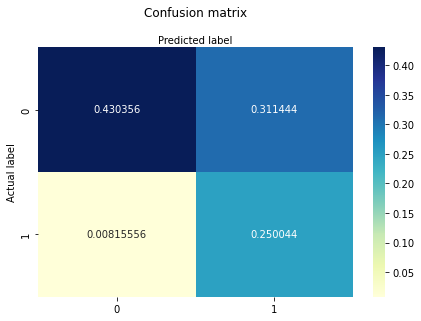

In [222]:
#plot the confusion matrix visually more appealing

class_names=[0,1]

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cm_f), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

As the plot shows, there are in total 27 predictions (N=108 participants * 25% test size). The upper left square in the **confusion matrix** contains all the **true positive** cases meaning that when a participant predicted as control belongs to the control group. Accordingly, the bottom right square carries information on **true negative** cases meaning a participant predicted as patient was a patient. On the contrary, the upper right square contains **false positives** cases (participant predicted as patient but was control) and the bottom left square contains information on **false negative** cases (participant predicted as control but was patient). At first sight, the model seems not to perform that well. Especially, actual controls being classified as patients might be difficult. However, there are other measures indicating the qualtiy of the model such as **accuracy, precision and recall**.

#### 2.1.3.2 Model accuracy, precision and recall

The accuracy measure indicates the percentage of correct predictions. The precision measure shows the correct positive predictions relative to total positive predictions. The recall measure indicates the correct positive predictions relative to total actual positives.

In [223]:
#compute accuracy, precision, recall

print("Accuracy:",metrics.accuracy_score(y_tests, y_preds)) 

print("Precision:",metrics.precision_score(y_tests, y_preds)) 

print("Recall:",metrics.recall_score(y_tests, y_preds)) 

Accuracy: 0.6804
Precision: 0.44532394031741007
Recall: 0.9684138049746106


#### 2.1.3.3 Receiver operating characteristic (ROC-Curve)

Another measure that provides information on the diagnostic ability of a binary classifier is a Receiver Operator Characteristic (ROC) curve. A ROC curve plots the true positiv rate (proportion of observations that were correctly predicted to be positive out of all positive observations) on the y-axis against the false positive rate (proportion of observations that are incorrectly predicted to be positiv out of all negative observations)on the x-axis. 

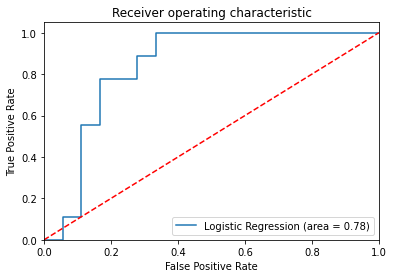

In [232]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Curves closer to the top-left corner indicate a better performance of the classifier. The closer the curve comes to the 45-degree diagonal of the ROC space, the less acurate the classifier is. As the plot shows, our model does not perform very well.

## 2.2 Micro-structural data: mean diffusivity and fractional anisotropy

In the following section, the logistic regression model is computed for micro-structural data in an analogous way as for the macro-structural data. 

### 2.2.1 Mean diffusivity

#### 2.2.1.1 Data preparation

In [233]:
#read data

MD_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_MD_cortexAv_mean_Dublin.csv')
MD_Dublin = pd.read_csv(MD_Dublin_path)

In [234]:
#adjust dataframe

MD_Dublin_adj = MD_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [235]:
#label group 1 as 0 and 2 as 1

MD_Dublin_adj['Group'] = MD_Dublin_adj['Group'].replace([1,2],[0, 1])

In [236]:
MD_Dublin_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,0,0.911,0.931,0.891,1.048,0.881,0.939,1.124,0.986,1.045,...,0.928,1.067,1.096,0.892,1.238,1.021,1.166,0.900,0.907,0.937
1,0,0.861,0.913,0.846,0.927,0.888,0.894,0.924,1.040,1.093,...,0.878,0.985,1.045,1.001,1.196,1.083,1.143,0.917,0.923,0.960
2,0,0.817,0.827,0.828,0.828,0.780,0.843,0.825,0.848,0.838,...,0.847,0.849,0.819,0.952,0.933,0.942,1.059,0.794,0.834,0.860
3,0,0.887,0.905,0.878,0.932,0.820,0.888,0.970,0.918,0.900,...,0.957,0.985,0.989,1.075,1.150,1.017,0.986,0.888,0.916,0.928
4,0,0.887,0.854,0.905,1.011,0.946,0.922,1.034,1.126,1.114,...,0.871,0.952,0.987,1.325,0.996,1.094,1.064,0.966,0.989,0.977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1,0.843,0.855,0.940,1.017,0.954,0.840,1.128,1.012,0.997,...,0.938,1.062,1.143,0.903,1.364,1.284,1.218,1.017,0.972,1.028
111,1,0.911,0.914,0.926,1.001,0.918,1.115,1.036,1.026,1.001,...,0.957,1.085,1.098,1.059,1.268,1.089,1.173,0.990,1.065,1.021
112,1,0.890,0.899,0.886,0.930,0.883,0.882,0.883,1.190,1.101,...,0.916,1.010,0.974,0.968,1.305,1.168,1.265,0.981,0.975,0.972
113,1,0.920,0.986,0.883,0.879,0.794,0.983,1.029,1.076,1.053,...,0.942,0.985,0.990,1.199,1.353,1.187,1.444,0.947,1.047,1.085


In [237]:
#dataframe as numpy array 

MD_Dublin_adj.to_numpy()

array([[0.   , 0.911, 0.931, ..., 0.9  , 0.907, 0.937],
       [0.   , 0.861, 0.913, ..., 0.917, 0.923, 0.96 ],
       [0.   , 0.817, 0.827, ..., 0.794, 0.834, 0.86 ],
       ...,
       [1.   , 0.89 , 0.899, ..., 0.981, 0.975, 0.972],
       [1.   , 0.92 , 0.986, ..., 0.947, 1.047, 1.085],
       [1.   , 0.97 , 0.868, ..., 1.125, 1.11 , 1.139]])

#### 2.2.1.2 Build the model

In [238]:
#define input

X_MD = MD_Dublin_adj.iloc[:,1:308].values

In [239]:
#output

y_MD = MD_Dublin_adj.iloc[:,[0]].values

In [240]:
y_MD

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [274]:
y_MD = y_MD.ravel()

In [275]:
y_MD.shape

(115,)

In [241]:
X_MD

array([[0.911, 0.931, 0.891, ..., 1.166, 0.9  , 0.907],
       [0.861, 0.913, 0.846, ..., 1.143, 0.917, 0.923],
       [0.817, 0.827, 0.828, ..., 1.059, 0.794, 0.834],
       ...,
       [0.89 , 0.899, 0.886, ..., 1.265, 0.981, 0.975],
       [0.92 , 0.986, 0.883, ..., 1.444, 0.947, 1.047],
       [0.97 , 0.868, 0.94 , ..., 1.284, 1.125, 1.11 ]])

In [279]:
n_iter_MD = 5000
y_preds_MD = []
y_tests_MD = []

# scale before splitting into test and train samples
X_sc_MD = StandardScaler().fit_transform(X_MD)

for i in range(n_iter):
    # take a new testing and training sample
    X_train_MD, X_test_MD, y_train_MD, y_test_MD = train_test_split(X_sc_MD, y_MD, test_size = 0.25, random_state = i)
    y_tests_MD.append(y_test_MD)  # store the y_test sample
    
    # fit the logistic regression
    classifier_MD = LogisticRegression(random_state = i, solver ='liblinear')
    classifier_MD.fit(X_train_MD, y_train_MD)
    
    # get the y predictions and store
    y_pred_MD = classifier_MD.predict(X_test_MD)
    y_preds_MD.append(y_pred_MD)

In [280]:
y_preds_MD = np.concatenate(y_preds_MD)

In [284]:
y_tests_MD = np.concatenate(y_tests_MD)

#### 2.2.1.3 Model evaluation

##### 2.2.1.3.1 Confusion matrix

In [287]:
#confusion matrix

cm_MD = confusion_matrix(y_tests_MD, y_preds_MD)

cm_MD_f = cm_MD/np.sum(cm_MD)
  
print ("Confusion Matrix : \n", cm_MD_f)

Confusion Matrix : 
 [[0.53775172 0.1744069 ]
 [0.07224828 0.2155931 ]]


In [ ]:
# plot the confusion matrix visually more appealing

class_names=[0,1]

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cm_MD), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

##### 2.2.1.3.2  Model accuracy, precision and recall

In [288]:
#compute accuracy, precision, recall

print("Accuracy:",metrics.accuracy_score(y_tests_MD, y_preds_MD)) 

print("Precision:",metrics.precision_score(y_tests_MD, y_preds_MD)) 

print("Recall:",metrics.recall_score(y_tests_MD, y_preds_MD)) 

Accuracy: 0.7533448275862069
Precision: 0.5528028293545535
Recall: 0.7489996885257685


##### 2.2.1.3.3 ROC-curve

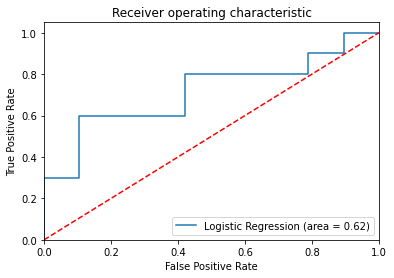

In [289]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_MD, classifier_MD.predict(X_test_MD))
fpr, tpr, thresholds = roc_curve(y_test_MD, classifier_MD.predict_proba(X_test_MD)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### 2.2.2 Fractional anisotropy

#### 2.2.2.1 Data preparation

In [258]:
#read data

FA_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_FA_cortexAv_mean_Dublin.csv')
FA_Dublin = pd.read_csv(FA_Dublin_path)

In [259]:
#adjust dataframe

FA_Dublin_adj = FA_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [260]:
#label group 1 as 0 and 2 as 1

FA_Dublin_adj['Group'] = FA_Dublin_adj['Group'].replace([1,2],[0, 1])

In [261]:
#dataframe as numpy array 

FA_Dublin_adj.to_numpy()

array([[0.   , 0.322, 0.147, ..., 0.157, 0.147, 0.137],
       [0.   , 0.302, 0.155, ..., 0.152, 0.148, 0.152],
       [0.   , 0.324, 0.18 , ..., 0.171, 0.174, 0.143],
       ...,
       [1.   , 0.323, 0.173, ..., 0.181, 0.143, 0.151],
       [1.   , 0.311, 0.174, ..., 0.162, 0.145, 0.123],
       [1.   , 0.294, 0.164, ..., 0.145, 0.147, 0.127]])

#### 2.2.2.2 Build the model

In [262]:
#define input

X_FA = FA_Dublin_adj.iloc[:,1:308].values

In [263]:
#output

y_FA = FA_Dublin_adj.iloc[:,[0]].values

In [291]:
y_FA = y_FA.ravel()

In [292]:
n_iter_FA = 5000
y_preds_FA = []
y_tests_FA = []

# scale before splitting into test and train samples
X_sc_FA = StandardScaler().fit_transform(X_FA)

for i in range(n_iter):
    # take a new testing and training sample
    X_train_FA, X_test_FA, y_train_FA, y_test_FA = train_test_split(X_sc_FA, y_FA, test_size = 0.25, random_state = i)
    y_tests_FA.append(y_test_FA)  # store the y_test sample
    
    # fit the logistic regression
    classifier_FA = LogisticRegression(random_state = i, solver ='liblinear')
    classifier_FA.fit(X_train_FA, y_train_FA)
    
    # get the y predictions and store
    y_pred_FA = classifier_FA.predict(X_test_FA)
    y_preds_FA.append(y_pred_FA)

In [293]:
y_preds_FA = np.concatenate(y_preds_FA)

In [294]:
y_tests_FA = np.concatenate(y_tests_FA)

### 2.2.2.3 Model evaluation

#### 2.2.2.3.1 Confusion matrix

In [299]:
#confusion matrix

cm_FA = confusion_matrix(y_tests_FA, y_preds_FA)

cm_FA_f = cm_FA / np.sum(cm_FA)
  
    
print ("Confusion Matrix : \n", cm_FA_f)

Confusion Matrix : 
 [[0.44114483 0.27101379]
 [0.05823448 0.2296069 ]]


Text(0.5, 257.44, 'Predicted label')

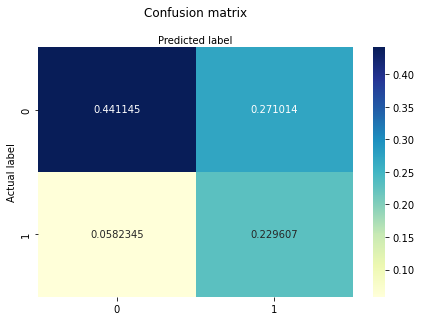

In [300]:
# plot the confusion matrix visually more appealing

class_names=[0,1]

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cm_FA_f), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

#### 2.2.2.3.2 Model accuracy, precision and recall

In [301]:
#compute accuracy, precision, recall

print("Accuracy:",metrics.accuracy_score(y_tests_FA, y_preds_FA)) 

print("Precision:",metrics.precision_score(y_tests_FA, y_preds_FA)) 

print("Recall:",metrics.recall_score(y_tests_FA, y_preds_FA)) 

Accuracy: 0.670751724137931
Precision: 0.4586444413831106
Recall: 0.7976855068644129


#### 2.2.2.3.3 ROC-curve

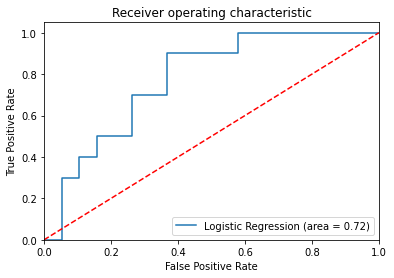

In [302]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_FA, classifier_FA.predict(X_test_FA))
fpr, tpr, thresholds = roc_curve(y_test_FA, classifier_FA.predict_proba(X_test_FA)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()